# Scattering Amplitudes

This notebook examines features of scattering amplitudes. We focus on $\mathbf{2}\to\mathbf{2}$, where the $\mathbf{2}$ refers to the number of hadrons in the initial/final state. Moreover, we assume that the hadrons are spinless particles, e.g. the $\pi$.

The scattering amplitude is defined as
$$
\langle\mathbf{2}|S-1|\mathbf{2}\rangle = (2\pi)^{4}\delta(P'-P) \, i\mathcal{M}(E^{\star},\theta^{\star}) \, ,
$$
where $S$ is the $S$ matrix and the $-1$ removes the cases where the particles do not scatter.

We also focus on the partial wave projected scattering amplitude, $\mathcal{M}_{\ell}(s)$, where $\ell$ is the angular momentum between the two hadrons.

$$
    \mathcal{M}_{\ell}(s) = \frac{1}{2} \int_{-1}^{1}\!\mathrm{d}\cos\theta \, P_{\ell}(\cos\theta) \mathcal{M}(s,\theta)
$$

In [2]:
import cmath as cm
import math as m
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

## Complex Square Root

It is convenient for us to define the square root function to have a branch cut along $z\in [0,\infty)$. We use the following definition: 

$\sqrt{z} \longrightarrow i \sqrt{-z}$



In [3]:
def mySqrt( z ):
    return 1j * np.sqrt( -z )

## Two-particle Kinematics

A single particle of mass $m$ and carrying momentum $\mathbf{p}$ has a four-momentum $p = (\omega_p,\mathbf{p})$ where $\omega_p = \sqrt{m^2 + \mathbf{p}^2}$ is the energy of the particle. If we have two particles, with masses $m_1$ and $m_2$, they each have a four-momentum $p_1 = (\omega_{p_1},\mathbf{p}_1)$ and $p_2 = (\omega_{p_2},\mathbf{p}_2)$, but the total four-momentum of the system is given by
$$
P = (E,\mathbf{P}) = p_1 + p_2 = (\omega_{p_1}+\omega_{p_2},\mathbf{p}_1+\mathbf{p}_2) \, .
$$
There is one special frame we will consider repeatedly, which is the <em>center-of-momentum</em> (CM) frame. The CM frame is defined as one where the total momentum of the two-particle system is zero, i.e. $\mathbf{P}^{\star} = \mathbf{0}$, where the $\star$ is a conventional notation to indicate the kinematic quantity is evaluated in the CM frame.

A useful Lorentz invariant, called the Mandelstam invariant $s$ or invariant mass-squared of the system, is defined as the CM energy-squared, i.e.,
$$
s \equiv E^{\star\,2} = E^2 - \mathbf{P}^2 = P_{\mu}P^{\mu} \, ,
$$
which gives a connection between the CM frame and some general frame defined by $\mathbf{P}$. In the CM frame, $\mathbf{p}_1^{\star} = -\mathbf{p}_2^{\star} \equiv \mathbf{q}^{\star}$, where the last equality defines the relative CM frame momentum between the two particles. The magnitude of the relative CM momentum is fixed by $s$ (the angles remain free to take on any physical value) and is given by
$$
\begin{align}
q^{\star} & = \frac{1}{2\sqrt{s}} \sqrt{ (s - (m_1+m_2)^2) (s - (m_1-m_2)^2) } \\[6pt]
%
& \xrightarrow[m_1 = m_2 \equiv m]{} \quad \frac{1}{2}\sqrt{s-4m^2} \, ,
\end{align}
$$
where the last line holds for the case of degenerate masses.

Exercises:
* What is the minimum value of $s$, $E^{\star}$ in a physical system?
* Show that $q^{\star} = \sqrt{s / 4 - m^2}$ for equal mass particles starting from the definition of $s$.
* Plot $q^{\star} / m$ as a function of $E^{\star} / m$ between the bounds $1.8\le E^{\star} / m \le 3.0$
* Show that in the equal mass case, each particle has an energy $\omega^{\star} = \sqrt{s} / 2$.
* Bonus - For un-equal masses, show that $q^{\star}$ follows from the definition of $s$, and each particle has a CM energy 
$$
\omega_{p_1}^{\star} = \frac{s + m_1^2 - m_2^2}{2\sqrt{s}} \, \qquad \omega_{p_2}^{\star} = \frac{s + m_2^2 - m_1^2}{2\sqrt{s}}
$$
* Bonus - Another special frame is the <em>target system</em> (TS) frame, which is defined such that $\mathbf{p}_1^{T} = \mathbf{P}^{T}$, that is, particle 2 is at rest ($\mathbf{p}_2^T = \mathbf{0}$). What is the magnitude of the momentum and energy of particle 1, i.e. $p_1^T$ and $\omega_{p_1}^{T}$?

## Two-particle Phase Space

A special kinematic function that appears in the study of scattering amplitudes is the two-body kinematic phase space function. This function characterizes the allowed energy domain that is accessible to a physical two-particle system.
We will look at this function from the context of a 1-loop integral in scalar field theory. Consider the integral
$$
i\mathcal{I}(P) = \xi \int\! \frac{\mathrm{d}^4k}{(2\pi)^4} \, \frac{i}{k^2 - m^2 + i\epsilon} \frac{i}{(P-k)^2 - m^2 + i\epsilon} \, ,
$$
which arises from the two-particle loop shown below. NOTE: We have neglected to include couplings from the vertices, but these are just (irrelevant for our purposes) multiplicative constants. The factor $\xi = 1/2$ for identical particles ($\xi = 1$ for distinguishable particles), and $P$ is the total momentum flowing through the system while $k$ is the loop momenta. If this was a standard QFT course, we would identify that this is a divergent integral, which needs regularization, evaluation with Feynman parameters, and eventual renormalization of the parameters of the theory. Here however, we are not interested in the diagram as a whole, but the piece of the diagram for which the virtual particles can go on their mass shell. Therefore, we will project this diagram on-shell, extracting the piece associated with physical scattering of the intermediate state. We will find that this on-shell piece is UV finite (as one expects for physical processes), and is associated with singularities of the function.

$$
\mathrm{Im}\, \mathcal{I} = \rho(s) \Theta(E^{\star} - 2m)
$$

$$
\rho(s) = \frac{\xi q^{\star}}{8\pi \sqrt{s}}
$$


Exercises:
* What are the dimensions of $\rho$?
* Show that
$$
\lim_{s\to \infty} \frac{16\pi}{\xi}\rho(s) = 1\, .
$$
* Plot $\rho(s)$ as a function of $E^{\star} / m$ between the bounds $1.8\le E^{\star} / m \le 3.0$
* Plot the real and imaginary parts of $\rho$ in the complex $s$-plane. Show there is a disconituity in the function about the real axis. Where is the branch point?
* Bonus - Repeat this for un-equal masses $m_1$ and $m_2$ (You should find $\rho$ takes the same structure)
* Using the Schwartz reflection principle ($f(z) = f^{*}(z^{*})$ given a region on the real axis where the function is real), show that the imaginary part of a function is related to the discontinuity of the function across the axis (indicating there exist a branch cut), with $\mathrm{Disc} \, f(z) = f(x + i\epsilon) - f(x - i\epsilon)$ where $x = \mathrm{Re}\,z$.
* Bonus - The function $\rho$ may look familiar if you've calculated a cross section. This function arises from the generic two-body phase space integral
$$
\mathrm{d}\Phi_{2}(p_1 + p_2 \to P) = \xi \frac{\mathrm{d}^3\mathbf{p}_1}{(2\pi)^3 \, 2\omega_1} \frac{\mathrm{d}^3\mathbf{p}_2}{(2\pi)^3 \, 2\omega_2} \, (2\pi)^4 \delta(P - p_1 - p_2) \, .
$$ 
Integrate $\mathrm{d}\Phi_2$ overall all allowed momentum, and recover $\rho$.
* Bonus - Repeat this exercise of a system in $1+1$ spacetime dimensions. What is $\rho_{1+1}$? What is it's dimensions?
* Bonus - Find the discontinuity of $i\mathcal{I}$ using Cutkoski rules.

In [5]:
def q_cm( s, m1, m2 ):
    arg = ( s - (m1+m2)**2 ) * ( s - (m1-m2)**2 )
    return 0.5 * mySqrt( arg ) / np.sqrt( s )

def rho( s, m1, m2, ident ):
    xi = 1.0
    if ( ident == 'yes' ):
        xi = 0.5
    return xi * q_cm( s, m1, m2 ) / ( 8.0 * m.pi * np.sqrt(s) )

/Users/andrewjackura/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 0.92, 'surface')

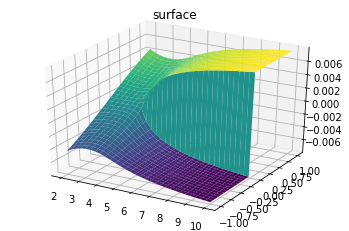

In [6]:
eps = 1e-16
m1 = 1.0
m2 = m1
ident = 'yes'
s_o_msq = np.arange(2, 10, 0.01)
rho_val = rho( s_o_msq+1j*eps, m1, m2, ident )
plt.plot(s_o_msq, 32.0*m.pi * rho_val.real)
plt.xlabel(r'$s / m^2$', position=(.85,1))
plt.ylabel(r'$\rho$')


x = np.linspace(2, 10, 30)
y = np.linspace(-1, 1, 30)

X, Y = np.meshgrid(x, y)
Z = rho( X+1j*Y, m1, m2, ident )

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z.real, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')

## On-Shell Amplitude

Generally, the on-shell amplitude in the elastic scattering kinematic region (i.e. $2m\le E^{\star} < 3m$) can be expressed in terms of the $K$ matrix, which is a real function in this domain

$$
\mathcal{M}_{\ell}(s) = \mathcal{K}_{\ell}(s)\frac{1}{1-i\rho(s) \mathcal{K}_{\ell}(s)}
$$

The $K$ matrix itself can be expressed in terms of the scattering <em>phase shift</em> ($\delta$), which has analogous features to phase shifts seen in Non-relativistic quantum scattering (cf. <em>Scattering Theory</em> by J.R. Taylor). We define the $K$ matrix in terms of the phase shift via
$$
\mathcal{K}^{-1}(s) = \rho(s) \cot\delta(s)
$$

$$
\mathcal{M}(s) = \frac{ 8\pi \sqrt{s} }{ \xi } \frac{1}{q^{\star}\cot\delta(s) - i q^{\star}}
$$


### Effective Range
Since the $K$ matrix is an analytic function in the region around the threshold, we can Taylor expand it in a power series in $q^{\star\,2}$. This can be cast into the <em>effective range expansion</em>, defined here (keeping only the first two terms) as
$$
q^{\star}\cot\delta = -\frac{1}{a} + \frac{1}{2} r q^{\star\,2} \, ,
$$
where $a$ is the scattering length (characterizing the strength of interaction) and $r$ is the effective range (characterizing the range of interaction).

### Breit-Wigner

$$
\tan\delta(s) = \frac{\sqrt{s} \Gamma(s) }{ m_0^2 - s }
$$
where $\Gamma$ is defined by
$$
\Gamma(s) = \frac{g_0^2}{6\pi} \frac{m_0^2}{s} q^{\star}
$$

NOTE: It is tempting to say that $m_0$ and $g_0$ are the mass and coupling of the resonance, this is not true. In the limit where the resonance is extremely narrow, one can find that this is true to leading order (Exercise), but in general this is not true. These are parameters (which for historical reasons we call the Breit-Wigner mass and coupling), which we could have just as easily called $c_0$ and $c_1$


Exercises:
* What are the dimensions of $\mathcal{M}$, $\mathcal{K}$, and $\delta$?
* What are the dimensions of $a$ and $r$?
* What are the dimensions of $m_0$ and $g_0$?
* Plot $\mathcal{M}$ as a function of $E^{\star} / m$ between the bounds $1.8\le E^{\star} / m \le 3.0$ for the Effective range using $ma = 2$ and $ma = -2$, and $mr = 0$.


<Figure size 1000x500 with 0 Axes>

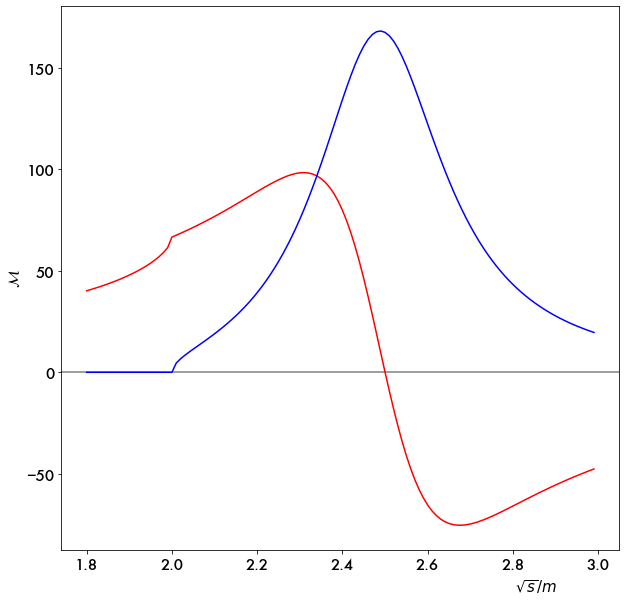

<Figure size 1000x500 with 0 Axes>

In [40]:
def Amplitude( s, m1, m2, Kmatrix, ident, args ):
    return Kmatrix(s,m1,m2,ident,*args) / ( 1.0 - 1j * rho(s,m1,m2,ident) * Kmatrix(s,m1,m2,ident,*args) )
    
def Kmatrix_BreitWigner( s, m1, m2, ident, m0, g0 ):
    Gamma = g0**2 * m0**2 * q_cm( s, m1, m2 ) / ( 6.0 * m.pi * s )
    tanDelta = np.sqrt( s ) * Gamma / ( m0**2 - s )
    return tanDelta / rho( s, m1, m2, ident )

def Kmatrix_EffectiveRange( s, m1, m2, ident, a, r ):
    xi = 1.0
    if ( ident == 'yes' ):
        xi = 0.5
    qCotDelta = -1.0 / a + 0.5 * r * q_cm( s, m1, m2 )**2
    return ( 8.0 * m.pi * np.sqrt(s) / xi ) / qCotDelta


eps = 1e-16
m1 = 1.0
m2 = m1
ident = 'yes'
a = 2
r = 0
m0 = 2.5
g0 = 3.0
Ecm_o_msq = np.arange(1.8, 3, 0.01)
#Mval = Amplitude( Ecm_o_msq**2+1j*eps, m1, m2, Kmatrix_EffectiveRange, ident, args=[a,r] )
Mval = Amplitude( Ecm_o_msq**2+1j*eps, m1, m2, Kmatrix_BreitWigner, ident, args=[m0,g0] )
plt.axhline(y=0.0, color='gray', linestyle='-')
plt.plot(Ecm_o_msq, Mval.real, color='red')
plt.plot(Ecm_o_msq, Mval.imag, color='blue')
plt.xlabel(r'$\sqrt{s} / m$', position=(.85,1),size=15)
plt.ylabel(r'$\mathcal{M}$',size=15)
plt.xticks(fontname="Futura",fontsize=15)
plt.yticks(fontname="Futura",fontsize=15)
#plt.rcParams['figure.figsize'] = (6, 7)
plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
#plt.rcParams['figure.figsize'] = [10, 10]


## Unitarity

An important property of scatterring amplitudes is the <em>Unitarity constraint</em>, which restricts the imaginary part of the amplitude. For $\mathbf{2}\to\mathbf{2}$ systems, the unitarity condition can be expressed as
$$
\mathrm{Im} \, \mathcal{M}(s) = \rho(s) \lvert \mathcal{M}(s) \rvert^2 \Theta(\sqrt{s} - 2m)
$$

(-1, 1)

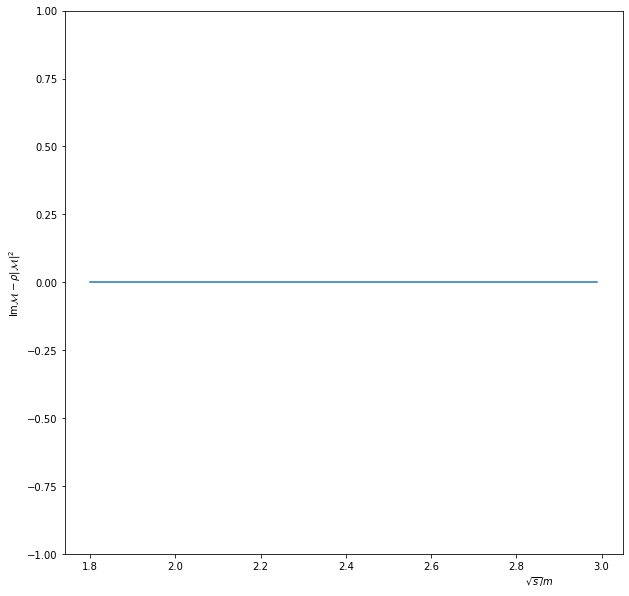

In [39]:
def UnitarityCheck( s, m1, m2, Kmatrix, ident, args  ):
    amp = Amplitude( s, m1, m2, Kmatrix, ident, args )
    return amp.imag - rho(s, m1, m2, ident ) * np.abs( amp )**2

eps = 1e-16
m1 = 1.0
m2 = m1
ident = 'yes'
a = 2
r = 0
m0 = 2.5
g0 = 3.0
Ecm_o_msq = np.arange(1.8, 3, 0.01)
#Mval = Amplitude( Ecm_o_msq**2+1j*eps, m1, m2, Kmatrix_EffectiveRange, ident, args=[a,r] )
Val = UnitarityCheck( Ecm_o_msq**2+1j*eps, m1, m2, Kmatrix_BreitWigner, ident, args=[m0,g0] )
#plt.plot(Ecm_o_msq, Magnitude(Mval))
plt.plot(Ecm_o_msq, Val)
plt.xlabel(r'$\sqrt{s} / m$', position=(.85,1))
plt.ylabel(r'$\mathrm{Im}\mathcal{M} - \rho|\mathcal{M}|^2$')

plt.ylim([-1, 1])

### Magnitudes and Phases

Instead of the real and imaginary parts, we can examine the magnitude and phase of the amplitude

$$
\mathcal{M}(s) = \lvert \mathcal{M}(s) \rvert \, e^{i\delta(s)}
$$
where $\delta$ is the phase of the amplitude, which is identical to the phase shift defined by the $K$ matrix.

Exercises:
* Show numerically that the phase of $\mathcal{M}$ is equal to the phase shift $\delta$, for both the effective range and Breit-Wigner amplitudes.
* Using the magnitude/phase representation and unitarity, show that the phase of the amplitude is the same phase shift presented in the on-shell representation.

Text(0, 0.5, '$\\varphi$')

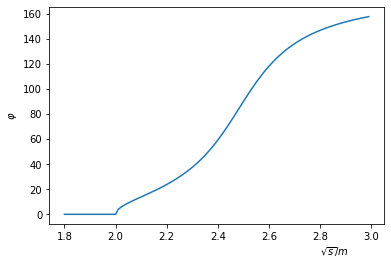

In [7]:
def Magnitude( amp ):
    return np.abs( amp )

def Phase( amp ):
    return 180.0 * np.arctan2( amp.imag, amp.real ) / m.pi


eps = 1e-16
m1 = 1.0
m2 = m1
ident = 'yes'
a = 2
r = 0
m0 = 2.5
g0 = 3.0
Ecm_o_msq = np.arange(1.8, 3, 0.01)
#Mval = Amplitude( Ecm_o_msq**2+1j*eps, m1, m2, Kmatrix_EffectiveRange, ident, args=[a,r] )
Mval = Amplitude( Ecm_o_msq**2+1j*eps, m1, m2, Kmatrix_BreitWigner, ident, args=[m0,g0] )
#plt.plot(Ecm_o_msq, Magnitude(Mval))
plt.plot(Ecm_o_msq, Phase(Mval))
plt.xlabel(r'$\sqrt{s} / m$', position=(.85,1))
plt.ylabel(r'$\varphi$')